In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import MinMaxScaler
from tensorflow.python.keras.models import Sequential
from tensorflow.python.keras.layers import Dense
from tensorflow.python.keras.wrappers.scikit_learn import KerasRegressor


In [3]:
import os;
path="C:/Users/qianl/Desktop/RFShimmingNN/"
os.chdir(path)
os.getcwd()

'C:\\Users\\qianl\\Desktop\\RFShimmingNN'

In [7]:
dataset=np.genfromtxt("Data_Input.csv", delimiter=",", skip_header = 1)


In [8]:
x = dataset[:, 0:18]
y= dataset[:, 18]
#y = np.log2(y)
y=np.reshape(y, (-1,1))
scaler_x = MinMaxScaler()
#scaler_y = MinMaxScaler()
print(scaler_x.fit(x))
xscale=scaler_x.transform(x)
#print(scaler_y.fit(y))
#yscale=scaler_y.transform(y)

MinMaxScaler(copy=True, feature_range=(0, 1))


In [9]:
y

array([[0.135508  ],
       [0.1390055 ],
       [0.1427187 ],
       ...,
       [0.03817661],
       [0.04044057],
       [0.04251343]])

In [11]:
X_train, X_test, y_train, y_test = train_test_split(xscale, y,test_size=0.3)
#X_train, X_test, y_train, y_test = train_test_split(x, y,test_size=0.2)

In [12]:
model = Sequential()
model.add(Dense(64, input_dim=18, activation='relu'))
#model.add(Dense(36, activation='relu'))
model.add(Dense(24, activation='relu'))
model.add(Dense(16, activation='relu'))
model.add(Dense(8, activation='relu'))

# model.add(Dense(16, input_dim=10, activation='relu'))
# model.add(Dense(12, activation='relu'))
# model.add(Dense(10, activation='relu'))
model.add(Dense(1, activation='linear'))
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 64)                1216      
_________________________________________________________________
dense_1 (Dense)              (None, 24)                1560      
_________________________________________________________________
dense_2 (Dense)              (None, 16)                400       
_________________________________________________________________
dense_3 (Dense)              (None, 8)                 136       
_________________________________________________________________
dense_4 (Dense)              (None, 1)                 9         
Total params: 3,321
Trainable params: 3,321
Non-trainable params: 0
_________________________________________________________________


In [13]:
model.compile(loss='mae', optimizer='adam', metrics=['mse','mae'])

In [14]:
history = model.fit(X_train, y_train, epochs=300, batch_size=50,  verbose=1, validation_split=0.2)

Train on 587201 samples, validate on 146801 samples
Epoch 1/300
587201/587201 [==============================] - 30s 51us/sample - loss: 0.0109 - mse: 3.1680e-04 - mae: 0.0109 - val_loss: 0.0058 - val_mse: 5.8141e-05 - val_mae: 0.0058
Epoch 2/300
587201/587201 [==============================] - 28s 48us/sample - loss: 0.0060 - mse: 6.0959e-05 - mae: 0.0060 - val_loss: 0.0070 - val_mse: 7.6218e-05 - val_mae: 0.0070
Epoch 3/300
587201/587201 [==============================] - 27s 46us/sample - loss: 0.0051 - mse: 4.5235e-05 - mae: 0.0051 - val_loss: 0.0050 - val_mse: 4.3360e-05 - val_mae: 0.0050
Epoch 4/300
587201/587201 [==============================] - 26s 44us/sample - loss: 0.0046 - mse: 3.7175e-05 - mae: 0.0046 - val_loss: 0.0041 - val_mse: 2.9737e-05 - val_mae: 0.0041
Epoch 5/300
587201/587201 [==============================] - 28s 48us/sample - loss: 0.0044 - mse: 3.3044e-05 - mae: 0.0044 - val_loss: 0.0076 - val_mse: 8.2513e-05 - val_mae: 0.0076
Epoch 6/300
587201/587201 [======

587201/587201 [==============================] - 28s 47us/sample - loss: 0.0029 - mse: 1.4604e-05 - mae: 0.0029 - val_loss: 0.0031 - val_mse: 1.6800e-05 - val_mae: 0.0031
Epoch 46/300
587201/587201 [==============================] - 28s 48us/sample - loss: 0.0028 - mse: 1.4382e-05 - mae: 0.0028 - val_loss: 0.0039 - val_mse: 2.6417e-05 - val_mae: 0.0039
Epoch 47/300
587201/587201 [==============================] - 28s 47us/sample - loss: 0.0028 - mse: 1.4313e-05 - mae: 0.0028 - val_loss: 0.0026 - val_mse: 1.2315e-05 - val_mae: 0.0026
Epoch 48/300
587201/587201 [==============================] - 28s 47us/sample - loss: 0.0029 - mse: 1.4455e-05 - mae: 0.0029 - val_loss: 0.0039 - val_mse: 2.4327e-05 - val_mae: 0.0039
Epoch 49/300
587201/587201 [==============================] - 28s 47us/sample - loss: 0.0028 - mse: 1.4281e-05 - mae: 0.0028 - val_loss: 0.0037 - val_mse: 2.2775e-05 - val_mae: 0.0037
Epoch 50/300
587201/587201 [==============================] - 28s 47us/sample - loss: 0.0028 

587201/587201 [==============================] - 27s 46us/sample - loss: 0.0027 - mse: 1.3103e-05 - mae: 0.0027 - val_loss: 0.0034 - val_mse: 1.8604e-05 - val_mae: 0.0034
Epoch 90/300
587201/587201 [==============================] - 27s 47us/sample - loss: 0.0027 - mse: 1.2937e-05 - mae: 0.0027 - val_loss: 0.0031 - val_mse: 1.5528e-05 - val_mae: 0.0031
Epoch 91/300
587201/587201 [==============================] - 28s 47us/sample - loss: 0.0027 - mse: 1.2977e-05 - mae: 0.0027 - val_loss: 0.0034 - val_mse: 1.9059e-05 - val_mae: 0.0034
Epoch 92/300
587201/587201 [==============================] - 29s 49us/sample - loss: 0.0027 - mse: 1.2864e-05 - mae: 0.0027 - val_loss: 0.0048 - val_mse: 3.6566e-05 - val_mae: 0.0048
Epoch 93/300
587201/587201 [==============================] - 28s 47us/sample - loss: 0.0027 - mse: 1.2894e-05 - mae: 0.0027 - val_loss: 0.0032 - val_mse: 1.7965e-05 - val_mae: 0.0032
Epoch 94/300
587201/587201 [==============================] - 27s 47us/sample - loss: 0.0027 

587201/587201 [==============================] - 28s 47us/sample - loss: 0.0026 - mse: 1.2040e-05 - mae: 0.0026 - val_loss: 0.0039 - val_mse: 2.2505e-05 - val_mae: 0.0039
Epoch 134/300
587201/587201 [==============================] - 27s 47us/sample - loss: 0.0026 - mse: 1.1968e-05 - mae: 0.0026 - val_loss: 0.0035 - val_mse: 2.0891e-05 - val_mae: 0.0035
Epoch 135/300
587201/587201 [==============================] - 28s 47us/sample - loss: 0.0026 - mse: 1.1948e-05 - mae: 0.0026 - val_loss: 0.0027 - val_mse: 1.3078e-05 - val_mae: 0.0027
Epoch 136/300
587201/587201 [==============================] - 28s 47us/sample - loss: 0.0026 - mse: 1.1976e-05 - mae: 0.0026 - val_loss: 0.0038 - val_mse: 2.3508e-05 - val_mae: 0.0038
Epoch 137/300
587201/587201 [==============================] - 29s 49us/sample - loss: 0.0026 - mse: 1.1945e-05 - mae: 0.0026 - val_loss: 0.0034 - val_mse: 1.9657e-05 - val_mae: 0.0034
Epoch 138/300
587201/587201 [==============================] - 27s 47us/sample - loss: 0.

587201/587201 [==============================] - 28s 47us/sample - loss: 0.0026 - mse: 1.1762e-05 - mae: 0.0026 - val_loss: 0.0024 - val_mse: 1.0004e-05 - val_mae: 0.0024
Epoch 178/300
587201/587201 [==============================] - 28s 47us/sample - loss: 0.0026 - mse: 1.1661e-05 - mae: 0.0026 - val_loss: 0.0026 - val_mse: 1.1586e-05 - val_mae: 0.0026
Epoch 179/300
587201/587201 [==============================] - 28s 47us/sample - loss: 0.0026 - mse: 1.1636e-05 - mae: 0.0026 - val_loss: 0.0038 - val_mse: 2.6734e-05 - val_mae: 0.0038
Epoch 180/300
587201/587201 [==============================] - 28s 47us/sample - loss: 0.0025 - mse: 1.1467e-05 - mae: 0.0025 - val_loss: 0.0031 - val_mse: 1.7999e-05 - val_mae: 0.0031
Epoch 181/300
587201/587201 [==============================] - 27s 47us/sample - loss: 0.0026 - mse: 1.1653e-05 - mae: 0.0026 - val_loss: 0.0038 - val_mse: 2.2805e-05 - val_mae: 0.0038
Epoch 182/300
587201/587201 [==============================] - 28s 48us/sample - loss: 0.

587201/587201 [==============================] - 27s 47us/sample - loss: 0.0025 - mse: 1.1253e-05 - mae: 0.0025 - val_loss: 0.0032 - val_mse: 1.8041e-05 - val_mae: 0.0032
Epoch 222/300
587201/587201 [==============================] - 28s 47us/sample - loss: 0.0025 - mse: 1.1281e-05 - mae: 0.0025 - val_loss: 0.0029 - val_mse: 1.5396e-05 - val_mae: 0.0029
Epoch 223/300
587201/587201 [==============================] - 28s 47us/sample - loss: 0.0025 - mse: 1.1065e-05 - mae: 0.0025 - val_loss: 0.0026 - val_mse: 1.1861e-05 - val_mae: 0.0026
Epoch 224/300
587201/587201 [==============================] - 27s 47us/sample - loss: 0.0025 - mse: 1.1122e-05 - mae: 0.0025 - val_loss: 0.0024 - val_mse: 1.0387e-05 - val_mae: 0.0024
Epoch 225/300
587201/587201 [==============================] - 27s 47us/sample - loss: 0.0025 - mse: 1.1170e-05 - mae: 0.0025 - val_loss: 0.0024 - val_mse: 1.0532e-05 - val_mae: 0.0024
Epoch 226/300
587201/587201 [==============================] - 27s 46us/sample - loss: 0.

587201/587201 [==============================] - 27s 47us/sample - loss: 0.0025 - mse: 1.1042e-05 - mae: 0.0025 - val_loss: 0.0029 - val_mse: 1.4997e-05 - val_mae: 0.0029
Epoch 266/300
587201/587201 [==============================] - 27s 46us/sample - loss: 0.0025 - mse: 1.0841e-05 - mae: 0.0025 - val_loss: 0.0041 - val_mse: 2.6465e-05 - val_mae: 0.0041
Epoch 267/300
587201/587201 [==============================] - 27s 47us/sample - loss: 0.0025 - mse: 1.0888e-05 - mae: 0.0025 - val_loss: 0.0033 - val_mse: 1.7386e-05 - val_mae: 0.0033
Epoch 268/300
587201/587201 [==============================] - 27s 46us/sample - loss: 0.0025 - mse: 1.0911e-05 - mae: 0.0025 - val_loss: 0.0062 - val_mse: 5.3880e-05 - val_mae: 0.0062
Epoch 269/300
587201/587201 [==============================] - 27s 47us/sample - loss: 0.0025 - mse: 1.0921e-05 - mae: 0.0025 - val_loss: 0.0050 - val_mse: 3.9240e-05 - val_mae: 0.0050
Epoch 270/300
587201/587201 [==============================] - 27s 46us/sample - loss: 0.

dict_keys(['loss', 'mse', 'mae', 'val_loss', 'val_mse', 'val_mae'])


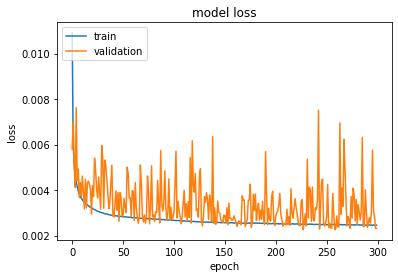

In [15]:
print(history.history.keys())
# "Loss"
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper left')
plt.show()

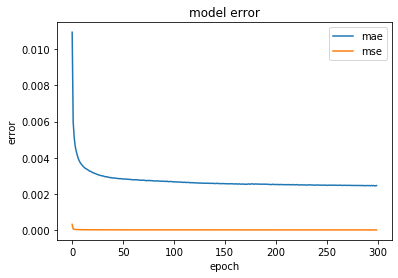

In [17]:
#Error
plt.plot(history.history['mae'])
plt.plot(history.history['mse'])
plt.title('model error')
plt.ylabel('error')
plt.xlabel('epoch')
plt.legend(['mae', 'mse'], loc='upper right')
plt.show()

In [18]:
train_predict = model.predict(X_train)
test_predict = model.predict(X_test)


In [19]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
mae = mean_absolute_error(train_predict, y_train)
mse = mean_squared_error(train_predict, y_train)
r2 = r2_score(train_predict, y_train)

print('Train Performance')
print("mae=%s, rmse=%s, r2=%s" % (mae, np.sqrt(mse), r2))

tmae = mean_absolute_error(y_test, test_predict)
tmse = mean_squared_error(y_test, test_predict)
tr2 = r2_score(test_predict, y_test)
print('Test Performance')
print("mae=%s, rmse=%s, r2=%s" % (tmae, np.sqrt(tmse), tr2))

Train Performance
mae=0.002303239914396957, rmse=0.0030533391945056915, r2=0.9989464243606407
Test Performance
mae=0.0023162405353043354, rmse=0.003073588788921849, r2=0.9989319139034298


In [20]:
import pandas as pd
import seaborn as sns
sns.set()


In [56]:
#yt=scaler_y.inverse_transform(y_train)
#ytp=scaler_y.inverse_transform(train_predict)
#ye=scaler_y.inverse_transform(y_test)
#yep=scaler_y.inverse_transform(test_predict)

yt=(y_train)
ytp=(train_predict)
ye=(y_test)
yep=(test_predict)

df_train = pd.DataFrame({"train_target ($^\circ$C)": yt[:,0], "train_predict ($^\circ$C)": ytp[:,0]})
df_test = pd.DataFrame({"test_target ($^\circ$C)": ye[:,0], "test_predict ($^\circ$C)": yep[:,0]})

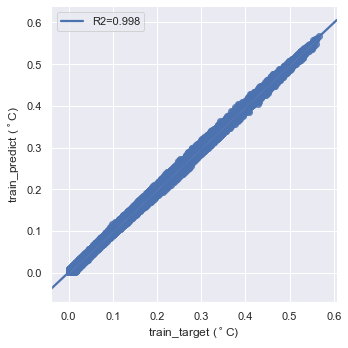

In [57]:
g_train = sns.lmplot(x="train_target ($^\circ$C)", y="train_predict ($^\circ$C)",data=df_train)
plt.legend(labels=['R2=0.998'])

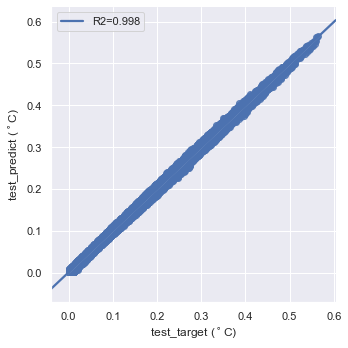

In [58]:
g_test=sns.lmplot(x="test_target ($^\circ$C)", y="test_predict ($^\circ$C)",data=df_test)
plt.legend(labels=['R2=0.998'])

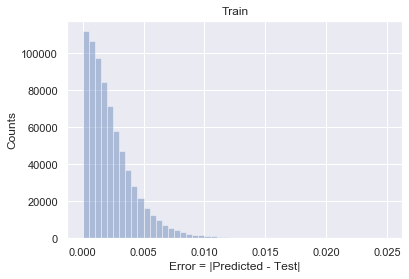

In [45]:
#prediction = scaler_y.inverse_transform(train_predict)
#target = scaler_y.inverse_transform(y_train)
#train_error = np.abs(np.power(2,prediction) - np.power(2,target))
#train_error = np.power(2,np.abs(prediction - target))
prediction = train_predict
target = y_train

train_error = np.abs(prediction-target)
#train_error = (prediction - target) / target
fig = sns.distplot(train_error,norm_hist = False, hist=True, kde=False,hist_kws={"range": [0,0.025]})
plt.xlabel("Error = |Predicted - Test|")
#plt.xlabel("Error = (Predicted - Target) /Target")
plt.ylabel("Counts")
plt.title("Train") # You can comment this line out if you don't need title
plt.show(fig)

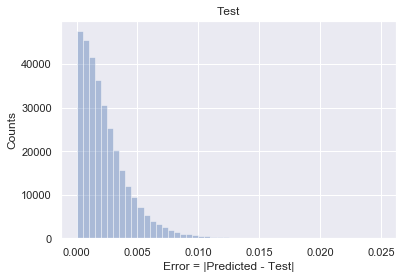

In [52]:
#prediction = scaler_y.inverse_transform(test_predict)
#target = scaler_y.inverse_transform(y_test)


prediction = test_predict
target = y_test

#test_error = np.abs(np.power(2,prediction) - np.power(2,target))
#test_error = (prediction - target) /target
#test_error = (y_test - test_predict)/test_predict
test_error = np.abs(prediction - target)
fig = sns.distplot(test_error, norm_hist = False, hist=True, kde=False,hist_kws={"range": [0,0.025]});
plt.xlabel("Error = |Predicted - Test|")
#plt.xlabel("Error = (Predicted - Target) /Target")
plt.ylabel("Counts")
plt.title("Test") # You can comment this line out if you don't need title
plt.show(fig)

In [48]:
train_mean_error = np.mean(train_error)
test_mean_error = np.mean(test_error)
print("train_mean_error=%s, test_mean_error=%s" % (train_mean_error, test_mean_error))

train_mean_error=0.002303239914396957, test_mean_error=0.0023162405353043354


In [345]:
model.save("radiology_ann_model.h5")